In [30]:
%matplotlib inline

from modsim import *
import random

In [10]:
given_years = [1980, 1993, 2005, 2007]
given_pop = [900, 1400, 1650, 2185]

In [80]:
bears = System(t0 = 1950, 
                t_end = 2010,
                pop0 = 2000,
                e_pop0_rate = 0.2,
                a_pop0_rate = 0.5,
                j_pop0_rate = 0.2,
                n_pop0_rate = 0.1,
                nursing_rate = 0.2475,
                aging_rate = 0.067,
                mature_rate = 0.25,
                birth_rate = 0.205,
                death_rate = 0.13525,
                baby_death_rate = 0.105,
                hunting_rate = 0.03)

# hunting_rate = linspace(0, 0.1, 21)

In [77]:
def run_simulation(system):
    
    elderly = TimeSeries()
    elderly[system.t0] = system.e_pop0_rate * system.pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.a_pop0_rate * system.pop0
    
    juveniles = TimeSeries()
    juveniles[system.t0] = system.j_pop0_rate * system.pop0
    
    nurses = TimeSeries()
    nurses[system.t0] = system.n_pop0_rate * system.pop0
    
    total = TimeSeries()
    total[system.t0] = system.pop0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * elderly[t]
        mature = system.mature_rate * juveniles[t]
        aging = system.aging_rate * adults[t]
        nursing = system.nursing_rate * nurses[t]
        infant_d = system.baby_death_rate * juveniles[t]
        adult_d = system.hunting_rate * (adults[t] + nurses[t])
        # random.choice(system.hunting_rate)
        
        juveniles[t+1] = juveniles[t] + births - mature - infant_d
        adults[t+1] = adults[t] + mature - aging - (births / 2) + nursing - adult_d
        elderly[t+1] = elderly[t] + aging - deaths
        nurses[t+1] = nurses[t] + (births / 2) - nursing
        total[t+1] = juveniles[t+1] + adults[t+1] + elderly[t+1] + nurses[t+1]
        
    system.total = total
    # system.elderly = elderly
    # system.adults = adults
    # system.juveniles = juveniles

In [78]:
def plot_results(system, title='Polar Bear Population by Year with Variable Hutning Rate'):
    
    newfig()
    # plot(system.elderly, 'r^-', label='elderly')
    # plot(system.adults, 'bo-', label='adults')
    # plot(system.juveniles, 'gs-', label='juveniles')
    plot(system.total, label='total')
    plot(given_years, given_pop, 'yo-', label='given')
    decorate(xlabel='Year', 
             ylabel='Polar Bear population',
             title=title)

Saving figure to file Project1_Try1-2


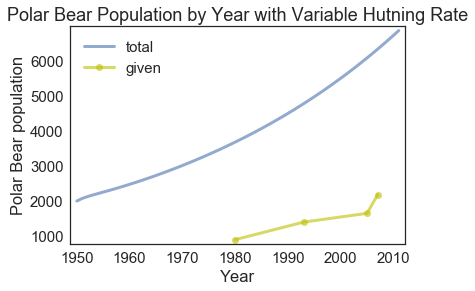

In [82]:
run_simulation(bears)
plot_results(bears)
savefig('Project1_Try1-2')

In [27]:
run_simulation(bears)
print(bears.total)

1950                                                 2000
1951    [2108.9, 2048.9, 1988.9, 1928.9, 1868.9, 1808....
dtype: object


Saving figure to file Project1_Rate2-2


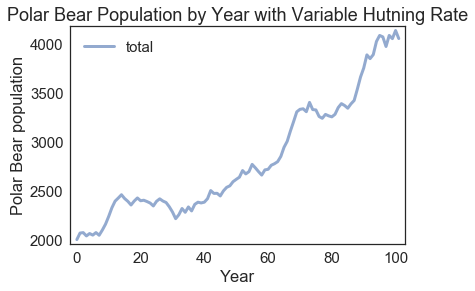

In [73]:
run_simulation(bears)
plot_results(bears)
savefig('Project1_Rate2-2')